In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions 

In [2]:
def evaluation(y_true, y_pred, title = ""):
    """
    This function is used to compute the confusion matrix 
    and other evaluation metrics.
    """
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix for {}: \n'.format(title), cm)
    total = sum(sum(cm))
    
    print('=============')
    accuracy = (cm[0,0] + cm[1,1]) /total
    print ('Accuracy    : {}'.format(accuracy))
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    print('Specificity :  {}'.format(Specificity))
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    print('Sensitivity :  {}'.format(sensitivity))
    
    
def plot_swarm(x, y, df):
    sns.set()
    sns.swarmplot(x=x, y = y, data = df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

### EDA 

### 1. users data 
- no duplicates in user_id
- non-null objects

In [3]:
user_df = pd.read_csv("users.csv").drop_duplicates()
user_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver
0,0,2019-03-01,en,US,"iPhone4,1",9.1
1,1,2019-03-01,en,IN,"iPod5,1",8.1.2
2,2,2019-03-06,en,US,"iPod7,1",8.4.1
3,3,2019-03-03,nb,NO,"iPhone8,1",9.2.1
4,4,2019-03-03,en,GB,"iPhone5,4",9.2.1


In [4]:
user_df.shape

(22576, 6)

In [5]:
user_df["install_date"] = pd.to_datetime(user_df["install_date"])

In [6]:
user_df["user_id"].nunique()

22576

In [7]:
user_df.shape[0] == user_df["user_id"].nunique()

True

In [8]:
display(user_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22576 entries, 0 to 22575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       22576 non-null  int64         
 1   install_date  22576 non-null  datetime64[ns]
 2   lang          22576 non-null  object        
 3   country       22564 non-null  object        
 4   hw_ver        22576 non-null  object        
 5   os_ver        22576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


None

### 2. sessions data 

In [9]:
sessions_df = pd.read_csv("sessions.csv").drop_duplicates()
sessions_df.head()

,user_id,ts,date,session_num,last_session_termination_type
0,14067,2019-03-01 00:06:50,2019-03-01,1,NaN
1,14067,2019-03-01 00:22:27,2019-03-01,2,NaN
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN


In [10]:
sessions_df["last_session_termination_type"].unique()

array([nan])

In [11]:
sessions_df["date"] = pd.to_datetime(sessions_df["date"])

In [12]:
sessions_df[sessions_df.user_id == 16275]

,user_id,ts,date,session_num,last_session_termination_type
2,16275,2019-03-01 01:23:03,2019-03-01,1,NaN
3,16275,2019-03-01 01:31:16,2019-03-01,2,NaN
4,16275,2019-03-01 01:47:22,2019-03-01,3,NaN
5,16275,2019-03-01 01:49:31,2019-03-01,4,NaN
6,16275,2019-03-01 02:06:51,2019-03-01,4,NaN
7,16275,2019-03-01 03:10:40,2019-03-01,5,NaN
14,16275,2019-03-01 07:34:08,2019-03-01,6,NaN
15,16275,2019-03-01 08:00:41,2019-03-01,7,NaN
16,16275,2019-03-01 08:31:34,2019-03-01,8,NaN
194,16275,2019-03-02 12:32:21,2019-03-02,9,NaN


In [13]:
sessions_df.drop_duplicates().shape

(722831, 5)

In [14]:
sessions_df.shape

(722831, 5)

In [15]:
sessions_df["user_id"].nunique()

22544

In [16]:
### remove users haven't converted to paying users after 30 days (it is very less likely that they will convert, but 
### sending out promotion won't hurt)
### remove users who are not active within the 7 days 

### 3. iaps data 

In [17]:
iaps_df = pd.read_csv("iaps.csv").drop_duplicates() ## this is for game adminitratiion's side
iaps_df.head()

,user_id,ts,date,prod_name,prod_type,rev
0,7480,2019-03-04 08:15:49,2019-03-04,iap_1_gems_2,gems,760
1,7480,2019-03-04 08:24:15,2019-03-04,iap_1_passes_2,chapterPasses,760
2,7480,2019-03-04 22:49:08,2019-03-04,iap_1_gems_1,gems,410
3,2466,2019-03-06 00:16:48,2019-03-06,iap_1_gems_2,gems,760
4,22001,2019-03-06 09:13:45,2019-03-06,iap_1_gems_2,gems,760


In [18]:
iaps_df.drop_duplicates().shape

(6622, 6)

In [19]:
iaps_df["date"] = pd.to_datetime(iaps_df["date"])

In [20]:
iaps_df.shape

(6622, 6)

In [21]:
iaps_df.user_id.nunique()

1526

In [22]:
iaps_df[iaps_df.user_id == 2062].sort_values(by="ts") 

,user_id,ts,date,prod_name,prod_type,rev
3795,2062,2019-03-03 03:50:45,2019-03-03,iap_1_gems_2,gems,760
3796,2062,2019-03-03 03:50:58,2019-03-03,iap_1_gems_2,gems,760
3797,2062,2019-03-03 04:01:32,2019-03-03,iap_1_passes_2,chapterPasses,760
3798,2062,2019-03-03 04:07:34,2019-03-03,iap_1_gems_2,gems,760
3799,2062,2019-03-03 10:40:27,2019-03-03,iap_1_passes_2,chapterPasses,760


<AxesSubplot:>

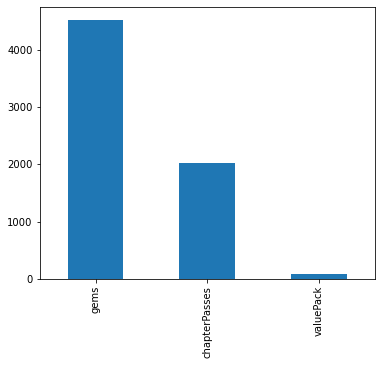

In [23]:
dfg = iaps_df['prod_type'].value_counts()
dfg.plot(kind='bar', figsize=(6, 5))


### 4. spendevents data 

In [24]:
spending_df = pd.read_csv("spendevents.csv")
spending_df.head()

,user_id,ts,date,story,chapter,spendtype,currency,amount
0,9829,2019-03-01 03:03:04,2019-03-01,story_1,0,earnGemsCounter,gems,-22
1,13757,2019-03-01 03:35:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22
2,13757,2019-03-01 03:52:10,2019-03-01,story_2,0,earnGemsCounter,gems,-22
3,10009,2019-03-01 04:10:00,2019-03-01,story_1,0,earnGemsCounter,gems,-22
4,10009,2019-03-01 04:26:46,2019-03-01,story_2,0,earnGemsCounter,gems,-22


In [25]:
spending_df["currency"].unique()

array(['gems'], dtype=object)

In [26]:
spending_df["date"] = pd.to_datetime(spending_df["date"])

In [27]:
spending_df[spending_df.user_id == 2062].sort_values(by="ts") ### this is for game adminitratiion's side

,user_id,ts,date,story,chapter,spendtype,currency,amount
15694,2062,2019-03-02 20:01:22,2019-03-03,story_1,0,earnGemsCounter,gems,-22
15721,2062,2019-03-03 03:50:45,2019-03-03,story_1,5,IAP,gems,-73
15722,2062,2019-03-03 03:50:58,2019-03-03,story_1,5,IAP,gems,-73
15723,2062,2019-03-03 03:51:00,2019-03-03,story_1,5,premiumChoice,gems,64
15724,2062,2019-03-03 04:07:34,2019-03-03,story_1,6,IAP,gems,-73
15725,2062,2019-03-03 04:07:37,2019-03-03,story_1,6,premiumChoice,gems,55
15726,2062,2019-03-03 04:24:58,2019-03-03,story_1,8,premiumChoice,gems,27


In [28]:
spending_df["ts"].value_counts()

2019-03-14 03:06:50    15
2019-03-14 03:15:00    15
2019-03-14 03:06:43    15
2019-03-14 03:06:20    15
2019-03-06 14:49:30     5
                       ..
2019-03-09 19:21:53     1
2019-03-01 01:18:26     1
2019-04-25 12:31:33     1
2019-03-01 16:10:08     1
2019-03-25 19:21:45     1
Name: ts, Length: 93689, dtype: int64

In [29]:
spending_df[spending_df.ts == '2019-03-14 03:06:20']

,user_id,ts,date,story,chapter,spendtype,currency,amount
58840,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58841,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58842,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58903,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58904,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58905,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58906,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58907,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58908,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0
58909,16895,2019-03-14 03:06:20,2019-03-14,story_3,0,earnGemsCounter,gems,0


In [30]:
spending_df[spending_df.ts == '2019-03-14 03:06:43']

,user_id,ts,date,story,chapter,spendtype,currency,amount
58915,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58916,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58917,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58918,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58919,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58920,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58921,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58922,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58923,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0
58924,16895,2019-03-14 03:06:43,2019-03-14,story_3,0,earnGemsCounter,gems,0


In [31]:
spending_df.shape

(107764, 8)

In [32]:
spending_df.drop_duplicates().shape

(98115, 8)

# Graphical EDA and insights 

### 1. Find the golden time 
- how long does it take for a new user to make the firsr in-app purchase
- from the plot, we can see that almost 90% of new users make their first in-app purchase within the first 10 days. 
- The minority of the new users convert slowly within 60 days. 
- We should not send out the promotion within the first 7 days, since high potential users will make purchase on that day. Sure things (or always-takers) are customers who were always going to buy the product, regardless of whether or not they received a marketing intervention. Hence, we don't want them to  take advantage of the sale instead of
paying full price. However, sending promotion occasionally will make them happier. 
- We will be learning the behavior of users who make purchases after 7 days. Those are the ones who may think twice about purchasing the and marketing intervention will push them towards making purchases. 

- When will we consider a payer as non-payer? from what we see in the data, we 
- We may want to figure out how mnay minutes it takes make the first purchase in the first day

In [33]:
users_iaps = pd.merge(user_df, iaps_df, on = "user_id")
users_iaps

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410
...,...,...,...,...,...,...,...,...,...,...,...
6617,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:39:35,2019-03-11,iap_1_gems_2,gems,760
6618,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-11 19:42:20,2019-03-11,iap_1_gems_2,gems,760
6619,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:12,2019-03-20,iap_1_gems_2,gems,760
6620,22569,2019-03-05,en,US,"iPad4,4",9.2.1,2019-03-20 08:53:49,2019-03-20,iap_1_passes_2,chapterPasses,760


In [34]:
users_iaps[users_iaps.user_id == 36]

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410
5,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:58,2019-03-02,iap_1_gems_1,gems,410
6,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:37:46,2019-03-02,iap_1_gems_2,gems,760
7,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:47:54,2019-03-02,iap_1_passes_5,chapterPasses,1810
8,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:03:26,2019-03-03,iap_1_gems_1,gems,410
9,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:04:04,2019-03-03,iap_1_gems_2,gems,760


In [35]:
users_iaps["days_to_first_purchase"] = users_iaps["date"] - users_iaps["install_date"]
users_iaps["days_to_first_purchase"] = users_iaps["days_to_first_purchase"].dt.days
users_iaps.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760,2
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760,3
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0


In [36]:
users_iaps["rank"] = users_iaps.groupby(["user_id"])["days_to_first_purchase"].rank(method="first", ascending=True)
users_iaps["rank"] = users_iaps["rank"].astype(int)
users_iaps.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase,rank
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2,1
2,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:07,2019-03-09,iap_1_gems_2,gems,760,2,2
3,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-10 13:04:04,2019-03-10,iap_1_passes_2,chapterPasses,760,3,3
4,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,iap_1_gems_1,gems,410,0,1


In [37]:
paying_users_df = users_iaps[users_iaps["rank"]==1]
paying_users_df.shape

(1526, 13)

Text(0.5, 1.0, 'ECDF plot of number of days it takes users to their first purchase')

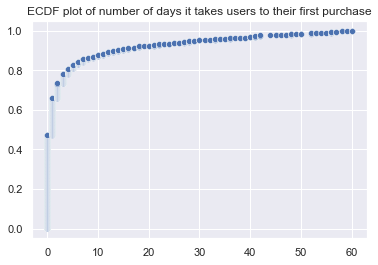

In [38]:
sns.set()
x_ecdf, y_ecdf = ecdf(paying_users_df["days_to_first_purchase"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of number of days it takes users to their first purchase")

In [39]:
y_ecdf[y_ecdf > 0.95].shape

(77,)

In [40]:
y_ecdf.shape

(1526,)

In [41]:
x_ecdf[(1526-77):]

array([29, 30, 30, 30, 31, 32, 33, 33, 33, 33, 33, 34, 34, 35, 35, 36, 36,
       36, 36, 37, 38, 38, 39, 39, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 42, 44, 45, 45, 46, 47, 47, 48, 48, 48, 48,
       49, 50, 50, 52, 52, 52, 53, 53, 54, 55, 56, 56, 56, 56, 56, 56, 56,
       56, 57, 57, 58, 58, 58, 59, 60, 60], dtype=int64)

In [42]:
paying_users_df.shape[0]==paying_users_df["user_id"].nunique()

True

In [43]:
paying_users_df.head(2)

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,prod_name,prod_type,rev,days_to_first_purchase,rank
0,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,iap_1_gems_2,gems,760,1,1
1,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:18:32,2019-03-09,iap_1_passes_2,chapterPasses,760,2,1


In [44]:
first_iap_day_df = paying_users_df[["user_id", "ts", "days_to_first_purchase",\
                                    "install_date"]].rename(columns={"ts": "iap_date"})
first_iap_day_df.head(2)

,user_id,iap_date,days_to_first_purchase,install_date
0,2,2019-03-07 11:50:37,1,2019-03-06
1,21,2019-03-09 10:18:32,2,2019-03-07


#### 2. Level of the first purchase 

In [45]:
users_spends_df = pd.merge(user_df, spending_df, on = "user_id")
users_spends_IAP_df = users_spends_df[users_spends_df.spendtype == 'IAP']
print(users_spends_IAP_df.shape)
users_spends_IAP_df.head(2)

(4915, 13)


,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount
5,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,story_1,2,IAP,gems,-73
54,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:06,2019-03-09,story_1,11,IAP,gems,-73


In [46]:
users_spends_IAP_df["days_to_first_purchase"] = users_spends_IAP_df["date"] - users_spends_IAP_df["install_date"]
users_spends_IAP_df["days_to_first_purchase"] = users_spends_IAP_df["days_to_first_purchase"].dt.days

C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
users_spends_IAP_df["user_id"].nunique()

1181

In [48]:
users_spends_IAP_df[users_spends_IAP_df.user_id == 36]

,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount,days_to_first_purchase
126,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,story_1,3,IAP,gems,-37,0
127,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:58,2019-03-02,story_1,3,IAP,gems,-37,0
129,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:37:46,2019-03-02,story_1,3,IAP,gems,-73,0
131,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:03:26,2019-03-03,story_1,5,IAP,gems,-37,1
132,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-03 00:04:04,2019-03-03,story_1,5,IAP,gems,-73,1


In [49]:
users_spends_IAP_df["rank"] = users_spends_IAP_df.groupby(['user_id'])['days_to_first_purchase'].rank(method="first", ascending=True)
users_spends_IAP_df["rank"] = users_spends_IAP_df["rank"].astype(int)
users_spends_IAP_df = users_spends_IAP_df[users_spends_IAP_df["rank"]==1]
users_spends_IAP_df.head()

C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NghiTram\anaconda3\envs\kaggleEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,install_date,lang,country,hw_ver,os_ver,ts,date,story,chapter,spendtype,currency,amount,days_to_first_purchase,rank
5,2,2019-03-06,en,US,"iPod7,1",8.4.1,2019-03-07 11:50:37,2019-03-07,story_1,2,IAP,gems,-73,1,1
54,21,2019-03-07,en,GB,"iPhone7,1",9.2.1,2019-03-09 10:53:06,2019-03-09,story_1,11,IAP,gems,-73,2,1
126,36,2019-03-02,en,US,"iPhone8,2",9.2.1,2019-03-02 23:34:17,2019-03-02,story_1,3,IAP,gems,-37,0,1
178,51,2019-03-02,en,US,"iPhone7,2",9.2.1,2019-03-02 22:38:53,2019-03-03,story_1,16,IAP,gems,-73,1,1
253,85,2019-03-07,en,US,"iPhone6,1",9.2,2019-04-17 18:26:44,2019-04-17,story_2,2,IAP,gems,-73,41,1


In [50]:
users_spends_IAP_df.shape[0] == users_spends_IAP_df["user_id"].nunique()

True

(array([405., 274., 120., 133.,  15.,  16.,  20.,   2.,  10.,   3.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

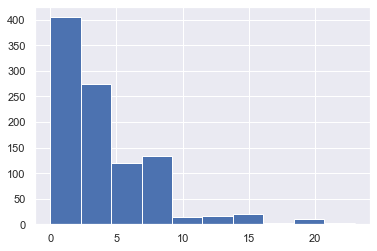

In [51]:
chapter_first_iaps = users_spends_IAP_df[users_spends_IAP_df.days_to_first_purchase < 7]
plt.hist(chapter_first_iaps["chapter"])

Text(0.5, 1.0, 'ECDF plot of current chapter at their first purchase')

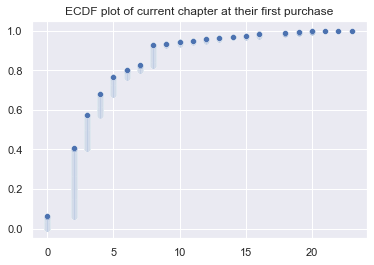

In [52]:
sns.set()
x_ecdf, y_ecdf = ecdf(chapter_first_iaps["chapter"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of current chapter at their first purchase")

(array([15.,  7.,  8.,  0.,  0.,  1.,  1.,  1.,  0.,  6.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

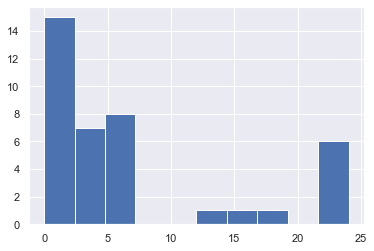

In [53]:
chapter_first_iaps = users_spends_IAP_df[users_spends_IAP_df.days_to_first_purchase > 30]
plt.hist(chapter_first_iaps["chapter"])

Text(0.5, 1.0, 'ECDF plot of current chapter at their first purchase')

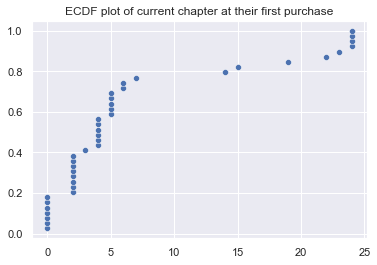

In [54]:
sns.set()
x_ecdf, y_ecdf = ecdf(chapter_first_iaps["chapter"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of current chapter at their first purchase")

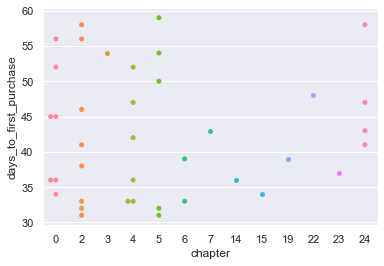

In [55]:
plot_swarm("chapter", "days_to_first_purchase", chapter_first_iaps)

(array([45., 64., 18., 16.,  5., 14.,  6.,  5.,  2.,  8.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

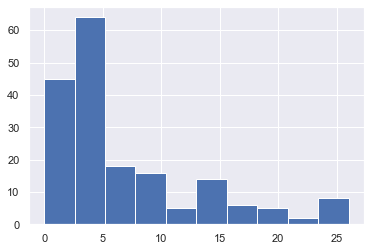

In [56]:
chapter_first_iaps = users_spends_IAP_df[users_spends_IAP_df.days_to_first_purchase >= 7]
plt.hist(chapter_first_iaps["chapter"])
### after 14 and 7 days, if users are still in the first 5 levels, then check their activeness in the game , how much gems 
# they have when making their first purchase, ---> map them to non-paying users 
## check to see if they are still in the first 5 levels after 7 or 14 days, and they are active in game, gems are running low
### then send promotion 

In [57]:
### after 14 days, calculate how long it takes for them to increase their levels, may send promotion their 

Text(0.5, 1.0, 'ECDF plot of current chapter at their first purchase')

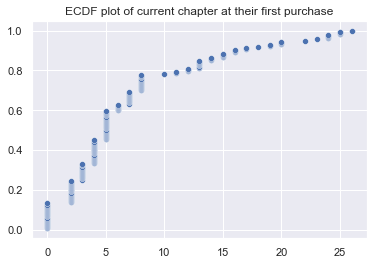

In [58]:
sns.set()
x_ecdf, y_ecdf = ecdf(chapter_first_iaps["chapter"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of current chapter at their first purchase")

In [59]:
users_spends_IAP_df["user_id"].nunique()

1181

In [60]:
users_spends_df[users_spends_df["spendtype"]=='valuepack'].shape

(39, 13)

### 3. Gems when making the first purchase 

In [61]:
users_gems = pd.merge(spending_df, first_iap_day_df, on = "user_id")
users_gems

,user_id,ts,date,story,chapter,spendtype,currency,amount,iap_date,days_to_first_purchase,install_date
0,1992,2019-03-01 12:10:53,2019-03-01,story_1,0,earnGemsCounter,gems,-22,2019-03-16 11:32:55,15,2019-03-01
1,1992,2019-03-16 11:32:55,2019-03-16,story_1,7,IAP,gems,-73,2019-03-16 11:32:55,15,2019-03-01
2,1992,2019-03-16 11:32:59,2019-03-16,story_1,7,premiumChoice,gems,43,2019-03-16 11:32:55,15,2019-03-01
3,1992,2019-03-19 20:41:25,2019-03-20,story_1,8,IAP,gems,-88,2019-03-16 11:32:55,15,2019-03-01
4,1992,2019-03-19 20:41:28,2019-03-20,story_1,8,premiumChoice,gems,24,2019-03-16 11:32:55,15,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...
27685,12279,2019-04-23 16:08:20,2019-04-23,story_6,7,premiumChoice,gems,29,2019-04-23 08:47:56,48,2019-03-06
27686,12279,2019-04-23 16:32:50,2019-04-23,story_4,0,earnGemsCounter,gems,-22,2019-04-23 08:47:56,48,2019-03-06
27687,18357,2019-05-01 06:50:58,2019-05-01,story_11,5,IAP,gems,-73,2019-05-01 06:50:58,59,2019-03-03
27688,18357,2019-05-01 06:51:01,2019-05-01,story_11,5,premiumChoice,gems,31,2019-05-01 06:50:58,59,2019-03-03


In [62]:
users_gems["user_id"].nunique()

1475

(array([941., 309., 111.,  18.,  20.,  22.,   1.,   0.,   0.,   4.]),
 array([-20. ,  25.8,  71.6, 117.4, 163.2, 209. , 254.8, 300.6, 346.4,
        392.2, 438. ]),
 <BarContainer object of 10 artists>)

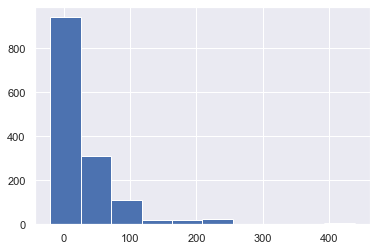

In [65]:
gems_before_iap_df = users_gems[(users_gems.ts < users_gems.iap_date)].sort_values(by=['user_id', "ts"])
total_gems_before_iap_df = gems_before_iap_df.groupby("user_id")["amount"].sum().reset_index()
total_gems_before_iap_df["amount"] = total_gems_before_iap_df["amount"]*(-1)
plt.hist(total_gems_before_iap_df["amount"])

Text(0.5, 1.0, 'ECDF plot of gems amount at their first purchase')

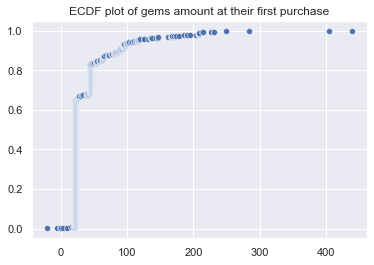

In [66]:
sns.set()
x_ecdf, y_ecdf = ecdf(total_gems_before_iap_df["amount"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of gems amount at their first purchase")

(array([ 1.,  0.,  0.,  1., 18.,  2.,  2.,  1.,  1., 13.,  0.,  2.,  0.,
         0.,  1.,  0.,  4.,  1.,  2.,  2.,  4.,  1.,  1.,  1.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ -1.,   4.,   9.,  14.,  19.,  24.,  29.,  34.,  39.,  44.,  49.,
         54.,  59.,  64.,  69.,  74.,  79.,  84.,  89.,  94.,  99., 104.,
        109., 114., 119., 124., 129., 134., 139., 144., 149., 154., 159.,
        164., 169., 174., 179., 184., 189., 194., 199., 204., 209., 214.,
        219., 224., 229., 234., 239., 244., 249.]),
 <BarContainer object of 50 artists>)

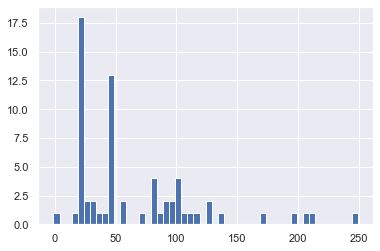

In [67]:
gems_before_iap_df = users_gems[(users_gems.ts < users_gems.iap_date)\
                                & (users_gems.days_to_first_purchase > 30)].sort_values(by=['user_id', "ts"])
total_gems_before_iap_df = gems_before_iap_df.groupby("user_id")["amount"].sum().reset_index()
total_gems_before_iap_df["amount"] = total_gems_before_iap_df["amount"]*(-1)
plt.hist(total_gems_before_iap_df["amount"], bins = 50)

Text(0.5, 1.0, 'ECDF plot of gems amount at their first purchase')

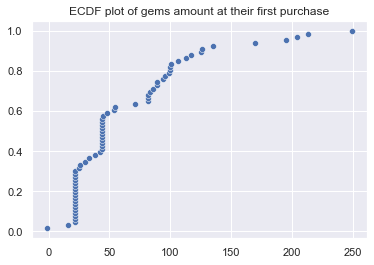

In [68]:
sns.set()
x_ecdf, y_ecdf = ecdf(total_gems_before_iap_df["amount"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of gems amount at their first purchase")

In [69]:
gems_before_iap_df = users_gems[(users_gems.ts < users_gems.iap_date)\
                               & (users_gems.days_to_first_purchase < 5)].sort_values(by=['user_id', "ts"])
total_gems_before_iap_df = gems_before_iap_df.groupby("user_id")["amount"].sum().reset_index()
total_gems_before_iap_df["amount"] = total_gems_before_iap_df["amount"]*(-1)
total_gems_before_iap_df

,user_id,amount
0,2,44
1,21,22
2,36,22
3,51,22
4,125,95
...,...,...
1155,22504,22
1156,22516,22
1157,22536,190
1158,22547,22


(array([828., 233.,  61.,   7.,   8.,  19.,   0.,   0.,   0.,   4.]),
 array([-20. ,  25.8,  71.6, 117.4, 163.2, 209. , 254.8, 300.6, 346.4,
        392.2, 438. ]),
 <BarContainer object of 10 artists>)

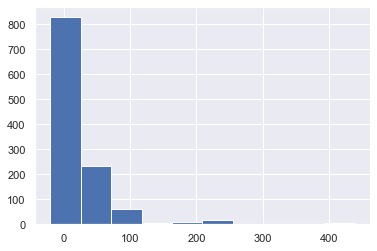

In [70]:
plt.hist(total_gems_before_iap_df["amount"])

Text(0.5, 1.0, 'ECDF plot of gem amount at their first purchase')

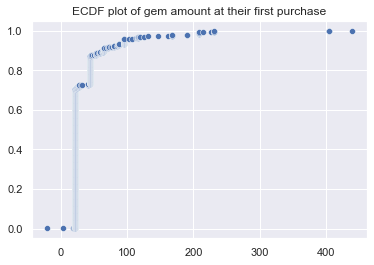

In [71]:
sns.set()
x_ecdf, y_ecdf = ecdf(total_gems_before_iap_df["amount"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of gem amount at their first purchase")

(array([ 3., 66., 33.,  7., 12.,  2.,  1.,  2.,  4.,  3.]),
 array([ -5. ,  16.4,  37.8,  59.2,  80.6, 102. , 123.4, 144.8, 166.2,
        187.6, 209. ]),
 <BarContainer object of 10 artists>)

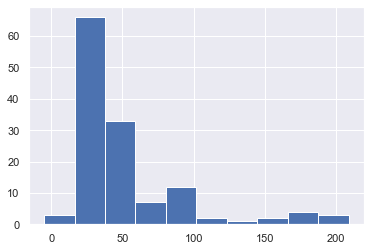

In [72]:
gems_before_iap_df = users_gems[(users_gems.ts < users_gems.iap_date)\
                                & (users_gems.days_to_first_purchase >= 5)\
                                & (users_gems.days_to_first_purchase <= 14)].sort_values(by=['user_id', "ts"])
total_gems_before_iap_df = gems_before_iap_df.groupby("user_id")["amount"].sum().reset_index()
total_gems_before_iap_df["amount"] = total_gems_before_iap_df["amount"]*(-1)
plt.hist(total_gems_before_iap_df["amount"])

Text(0.5, 1.0, 'ECDF plot of gem amount at their first purchase')

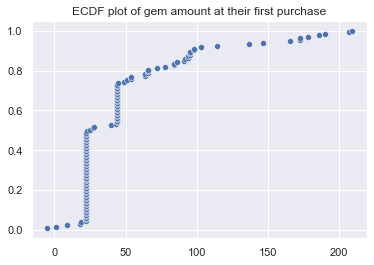

In [73]:
sns.set()
x_ecdf, y_ecdf = ecdf(total_gems_before_iap_df["amount"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of gem amount at their first purchase")

In [74]:
users_iaps.shape

(6622, 13)

In [75]:
iaps_df.shape

(6622, 6)

### 4. How activate they are 

In [76]:
users_sessions = pd.merge(first_iap_day_df, sessions_df, on = "user_id")
users_sessions.head()

,user_id,iap_date,days_to_first_purchase,install_date,ts,date,session_num,last_session_termination_type
0,2,2019-03-07 11:50:37,1,2019-03-06,2019-03-06 10:02:20,2019-03-06,1,NaN
1,2,2019-03-07 11:50:37,1,2019-03-06,2019-03-07 11:22:20,2019-03-07,2,NaN
2,2,2019-03-07 11:50:37,1,2019-03-06,2019-03-07 11:22:42,2019-03-07,3,NaN
3,2,2019-03-07 11:50:37,1,2019-03-06,2019-03-07 11:31:13,2019-03-07,4,NaN
4,2,2019-03-07 11:50:37,1,2019-03-06,2019-03-07 15:31:45,2019-03-07,5,NaN


(array([1.088e+03, 1.410e+02, 4.000e+01, 8.000e+00, 9.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  16.2,  31.4,  46.6,  61.8,  77. ,  92.2, 107.4, 122.6,
        137.8, 153. ]),
 <BarContainer object of 10 artists>)

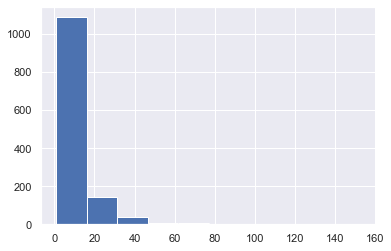

In [77]:
after_n_days = users_sessions[(users_sessions.days_to_first_purchase <= 6) & (users_sessions.ts < users_sessions.iap_date)]
idx = after_n_days.groupby("user_id")["session_num"].transform(max) == after_n_days["session_num"]
plt.hist(after_n_days[idx]["session_num"])

Text(0.5, 1.0, 'ECDF plot of num sessions at their first purchase')

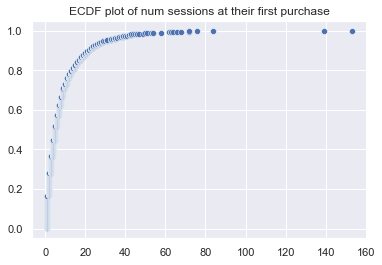

In [78]:
x_ecdf, y_ecdf = ecdf(after_n_days[idx]["session_num"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of num sessions at their first purchase")

Text(0.5, 1.0, 'ECDF plot of num sessions at their first purchase')

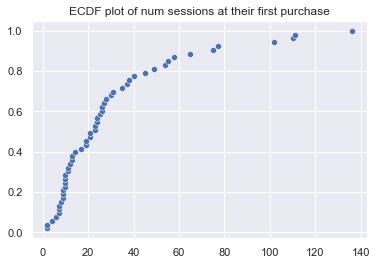

In [227]:
after_n_days = users_sessions[(users_sessions.days_to_first_purchase >= 7)\
                              & (users_sessions.days_to_first_purchase <= 10)\
                              & (users_sessions.ts < users_sessions.iap_date)]
idx = after_n_days.groupby("user_id")["session_num"].transform(max) == after_n_days["session_num"]
x_ecdf, y_ecdf = ecdf(after_n_days[idx]["session_num"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of num sessions at their first purchase")

Text(0.5, 1.0, 'ECDF plot of num sessions at their first purchase')

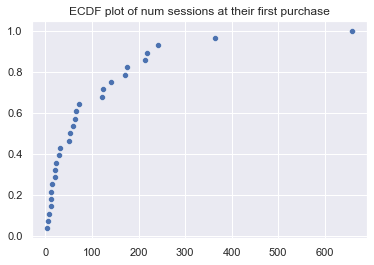

In [228]:
after_n_days = users_sessions[(users_sessions.days_to_first_purchase > 30)\
                              & (users_sessions.days_to_first_purchase)\
                             & (users_sessions.ts < users_sessions.iap_date)]
idx = after_n_days.groupby("user_id")["session_num"].transform(max) == after_n_days["session_num"]
x_ecdf, y_ecdf = ecdf(after_n_days[idx]["session_num"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of num sessions at their first purchase")

In [161]:
after_n_days["user_id"].nunique()

149

### 2. Let segment paying users into different group, and analyze their behavior 
- analyze behavior of users 

In [95]:
### 2. On average, how many in-app purchase new users make, if they make their first purchase after the first 10 days 

In [96]:
zero_day_iap_df = paying_users_df[paying_users_df.days_to_first_purchase == 0]
two_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase == 2) | \
                                 (paying_users_df.days_to_first_purchase == 1)]

three_to_5_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 3) \
                                        & (paying_users_df.days_to_first_purchase <= 5)]
six_to_10_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 6) \
                                        & (paying_users_df.days_to_first_purchase <= 10)]
after_7_days_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 7)]
ten_than_20_day_iap_df = paying_users_df[(paying_users_df.days_to_first_purchase >= 11) \
                                        & (paying_users_df.days_to_first_purchase <= 20)]

In [97]:
paying_users_df[paying_users_df.days_to_first_purchase <= 2].shape[0] / paying_users_df.shape[0]

0.7332896461336829

In [98]:
print(six_to_10_day_iap_df.shape)
more_than_10_day_iap_df.shape

(74, 13)


(70, 13)

#### analyze group 3-5 days iap

In [101]:
print(three_to_5_day_iap_df.shape)
three_to_5_day_iap_df.head()

(10906, 17)


,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,rev,days_to_first_purchase,rank,ts_y,date_y,session_num,last_session_termination_type
0,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN
1,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:02:50,2019-03-07,2,NaN
2,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:03:36,2019-03-07,3,NaN
3,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 05:55:52,2019-03-07,4,NaN
4,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-07 06:00:41,2019-03-07,5,NaN


In [102]:
three_to_5_day_iap_df = pd.merge(three_to_5_day_iap_df, sessions_df, on = "user_id")
three_to_5_day_iap_df.shape

(1681712, 21)

In [103]:
three_to_5_day_iap_df.head()

,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,...,days_to_first_purchase,rank,ts_y,date_y,session_num_x,last_session_termination_type_x,ts,date,session_num_y,last_session_termination_type_y
0,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 04:20:24,2019-03-07,1,NaN
1,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:02:50,2019-03-07,2,NaN
2,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:03:36,2019-03-07,3,NaN
3,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 05:55:52,2019-03-07,4,NaN
4,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,...,5,1,2019-03-07 04:20:24,2019-03-07,1,NaN,2019-03-07 06:00:41,2019-03-07,5,NaN


In [82]:
three_to_5_day_iap_df["days_from_installing"] = three_to_5_day_iap_df["date_y"] - three_to_5_day_iap_df["date_x"]
df_sessions_3_5_iap_df = three_to_5_day_iap_df[three_to_5_day_iap_df["days_from_installing"] <= 4
idx = three_to_5_day_iap_df.groupby(['user_id'])['session_num'].transform(max) == three_to_5_day_iap_df['session_num']
three_to_5_day_iap_df[idx]

,user_id,install_date,lang,country,hw_ver,os_ver,ts_x,date_x,prod_name,prod_type,rev,days_to_first_purchase,rank,ts_y,date_y,session_num,last_session_termination_type
66,313,2019-03-07,en,US,"iPhone6,1",9.2.1,2019-03-12 06:29:58,2019-03-12,iap_1_gems_2,gems,760,5,1,2019-03-16 23:19:11,2019-03-16,68,NaN
148,785,2019-03-07,en,GB,"iPad2,7",9.2,2019-03-10 18:24:22,2019-03-10,iap_1_gems_5,gems,1810,3,1,2019-05-05 17:07:54,2019-05-05,80,NaN
162,868,2019-03-04,en,US,"iPad4,1",9.2.1,2019-03-07 17:54:10,2019-03-07,iap_1_gems_2,gems,760,3,1,2019-03-12 07:45:18,2019-03-12,15,NaN
182,888,2019-03-06,en,CA,"iPad2,5",8.3,2019-03-09 18:53:33,2019-03-09,iap_1_gems_2,gems,760,3,1,2019-03-14 10:57:49,2019-03-14,20,NaN
340,916,2019-03-06,en,AU,"iPhone6,2",9.2,2019-03-09 02:17:14,2019-03-09,iap_1_gems_2,gems,760,3,1,2019-04-01 20:06:11,2019-04-01,159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,21842,2019-03-06,en,US,"iPhone7,2",9.2,2019-03-11 17:10:41,2019-03-11,iap_1_gems_2,gems,760,5,1,2019-03-29 20:38:03,2019-03-29,57,NaN
10617,22085,2019-03-01,en,GB,"iPhone7,1",9.1,2019-03-04 06:33:22,2019-03-04,iap_1_passes_2,chapterPasses,760,3,1,2019-03-23 12:15:41,2019-03-23,80,NaN
10635,22323,2019-03-03,en,US,"iPod5,1",9.2.1,2019-03-07 13:58:37,2019-03-07,iap_1_passes_1,chapterPasses,410,4,1,2019-03-21 13:35:50,2019-03-21,18,NaN
10819,22370,2019-03-04,en,BE,"iPhone6,2",9.2,2019-03-08 00:48:03,2019-03-08,iap_1_passes_2,chapterPasses,760,4,1,2019-05-01 18:18:24,2019-05-01,182,NaN


<AxesSubplot:>

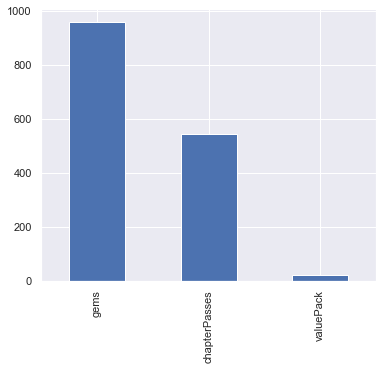

In [ ]:
### 1. Amount of gems left when making purchase and level
### 2. Find the main difference features/distribution ft that seperates two groups well 
### 3. Cluster according that features
### 4. 

In [ ]:
# Model 
- Paying users are class 1 
- Non-paying users are class 0
- build features 